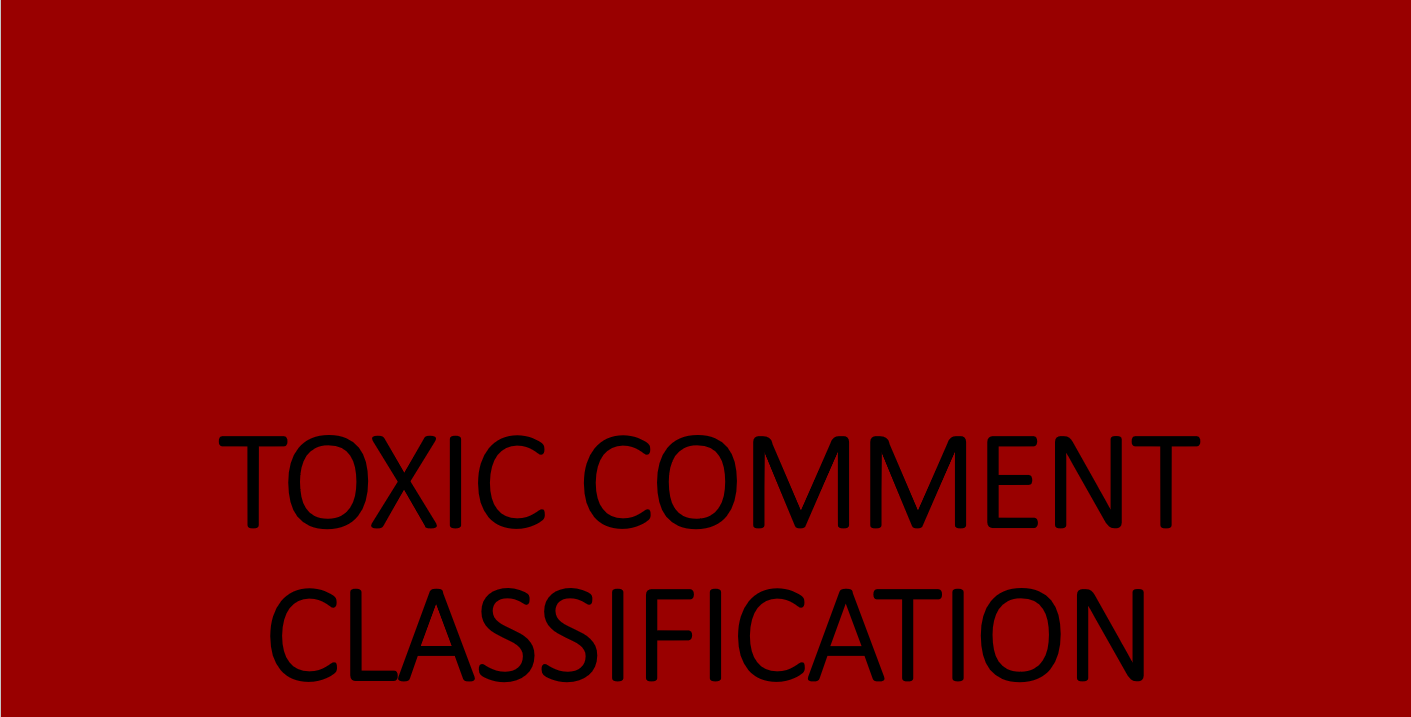




Toxic comment classification involves detecting and classifying text into categories such as:

Toxic: General harmful language, including rude or disrespectful comments.
Severe Toxic: Intensified toxicity, often involving explicit and extremely offensive content.
Obscene: Use of profane or vulgar language.
Threat: Comments containing explicit or implicit threats of violence or harm.
Insult: Personal attacks or derogatory statements targeting individuals or groups.
Identity Hate: Hate speech aimed at specific identities, such as race, gender, religion, or sexual orientation.


The primary goal of this task is to help ensure safe and respectful communication in online platforms, such as social media, forums, and comment sections.

Import modules

In [385]:

import pandas as pd   # for efficient data manipulation and analysis in python.

import numpy as np    # enabling effient numerical computations and operations on arrays.

import re             #allowing pattern matching and text manipulation.

import matplotlib.pyplot as plt  # for data visualization.
    
import seaborn as sns          #enabling advanced statistical data visualization and making it easier to generate informative and attractive plots.

                       
import nltk                    # which provides tools for text processing, tokenization, stemming, lemmatization, and other natural language processing 
                               #tasks


from nltk.tokenize import word_tokenize # splitting a text and sentence into individul word.

from nltk.corpus import stopwords # used to import a list of common stop words (such as "the", "and", "is") that are typically removed-
                                  #during text preprocessing in natural language processing tasks.


from nltk.stem.snowball import SnowballStemmer #reducing words to their root forms (e.g: "running" to "run").

from sklearn.model_selection import train_test_split # it spil the dataset  into training and testing  subsets.


from sklearn.feature_extraction.text import TfidfVectorizer # it converts a collection of text documents into a matrix of TF-IDF (Term Frequency-
                                                             #Inverse Document Freqency) features.
                                                             #features.

from sklearn.pipeline import Pipeline                      #which allows you to chain multiple processing steps (such as preprocessing, feature 
                                                           #extraction, and model fitting) into a single object, simplifying the workflow and ensuring 
                                                           #consistency during model training and evaluation.


from sklearn.multiclass import OneVsRestClassifier        #It  is used to handle multi-label classification tasks.


from sklearn.linear_model import LogisticRegression      #It is a machine learning model used for binary or multiclass classification tasks.


from sklearn.naive_bayes import MultinomialNB           # Naive Bayes classifier commonly used for text classification tasks

from sklearn.metrics import accuracy_score,classification_report  # Measures the accuracy of a model by comparing predicted labels with actual labels.

                                                                  #Generates a report that includes precision, recall, f1-score, and support for each 
                                                                  #class in classification tasks.

import warnings                                                   #used to suppress warning messages in Python, ensuring a cleaner output during code 
                                                                  #execution.
warnings.filterwarnings('ignore')


Load the dataset

In [388]:
df=pd.read_csv('jigsaw-toxic-comment-train-processed-seqlen128.csv')

In [389]:
#Displays first five rows for quick inspection of the structure and content of data set
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,input_word_ids,input_mask,all_segment_id
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"(101, 27746, 31609, 11809, 24781, 10105, 70971...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"(101, 141, 112, 56237, 10874, 106, 10357, 1825...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"(101, 35936, 10817, 117, 146, 112, 181, 30181,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"(101, 107, 15946, 146, 10944, 112, 188, 13086,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"(101, 11065, 117, 52523, 117, 10301, 15127, 51...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [390]:
#Displays last five rows for quick inspection of the structure and content of data set
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,input_word_ids,input_mask,all_segment_id
223544,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0,"(101, 131, 43325, 117, 146, 12888, 13028, 1479...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
223545,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0,"(101, 134, 134, 22716, 19111, 101695, 134, 134...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
223546,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0,"(101, 134, 134, 48201, 18969, 10135, 13028, 10...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
223547,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0,"(101, 47430, 11369, 144, 72918, 10731, 30118, ...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
223548,fffb5451268fb5ba,""" \n\n == Unicorn lair discovery == \n\n Suppo...",0,0,0,0,0,0,"(101, 107, 134, 134, 22966, 69212, 84971, 3041...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [391]:
#check diamensions of a dataset
df.shape

(223549, 11)

In [392]:
#verify datatype of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223549 entries, 0 to 223548
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              223549 non-null  object
 1   comment_text    223549 non-null  object
 2   toxic           223549 non-null  int64 
 3   severe_toxic    223549 non-null  int64 
 4   obscene         223549 non-null  int64 
 5   threat          223549 non-null  int64 
 6   insult          223549 non-null  int64 
 7   identity_hate   223549 non-null  int64 
 8   input_word_ids  223549 non-null  object
 9   input_mask      223549 non-null  object
 10  all_segment_id  223549 non-null  object
dtypes: int64(6), object(5)
memory usage: 18.8+ MB


In [398]:

df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,223549.000000,223549.000000,223549.000000,223549.000000,223549.000000,223549.000000
mean,0.095657,0.008777,0.054306,0.003082,0.050566,0.009470
std,0.294121,0.093272,0.226621,0.055431,0.219110,0.096852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [400]:
# count unique values in the output columns
df['toxic'].value_counts()	

toxic
0    202165
1     21384
Name: count, dtype: int64

In [402]:
df['severe_toxic'].value_counts()	

severe_toxic
0    221587
1      1962
Name: count, dtype: int64

In [404]:
df['obscene'].value_counts()

obscene
0    211409
1     12140
Name: count, dtype: int64

In [406]:
df['threat'].value_counts()

threat
0    222860
1       689
Name: count, dtype: int64

In [408]:
df['insult'].value_counts()

insult
0    212245
1     11304
Name: count, dtype: int64

In [410]:
df['identity_hate'].value_counts()

identity_hate
0    221432
1      2117
Name: count, dtype: int64

Data preprocessing

In [413]:
#check any null values available in the dataset
df.isna().sum()

id                0
comment_text      0
toxic             0
severe_toxic      0
obscene           0
threat            0
insult            0
identity_hate     0
input_word_ids    0
input_mask        0
all_segment_id    0
dtype: int64

In [415]:
#check any duplicate values available in the dataset
df.duplicated().sum()

0

In [416]:
#drop columns which have less relation
df1=df.drop(['id','input_word_ids','input_mask','all_segment_id'],axis=1)

In [417]:

df1.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


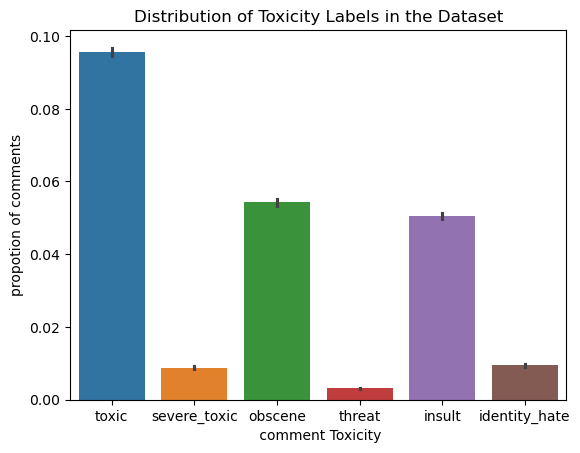

In [421]:
sns.barplot(data=df1)
plt.title("Distribution of Toxicity Labels in the Dataset")
plt.xlabel(" comment Toxicity")
plt.ylabel("propotion of comments")
plt.show()

In [422]:
df1.columns

Index(['comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [423]:
text=df1['comment_text']

In [424]:
type(text)

pandas.core.series.Series

In [425]:
text1=[]

In [426]:
#remove non special characters and punctuations

for i in text:
  text=re.sub('[^a-zA-Z\s]+','',i)

  text1.append(text)

In [427]:
text1

['Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted They werent vandalisms just closure on some GAs after I voted at New York Dolls FAC And please dont remove the template from the talk page since Im retired now',
 'Daww He matches this background colour Im seemingly stuck with Thanks  talk  January   UTC',
 'Hey man Im really not trying to edit war Its just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page He seems to care more about the formatting than the actual info',
 '\nMore\nI cant make any real suggestions on improvement  I wondered if the section statistics should be later on or a subsection of types of accidents  I think the references may need tidying so that they are all in the exact same format ie date format etc I can do that later on if noone else does first  if you have any preferences for formatting style on references or want to do it yourself please let me know\n\nThe

In [428]:
text=pd.Series(text1)

In [429]:
#remove the words which are having lenth less than 3
text=text.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))

In [439]:
text

0         Explanation Why the edits made under username ...
1         Daww matches this background colour seemingly ...
2         Hey man really not trying edit war Its just th...
3         More cant make any real suggestions improvemen...
4         You sir are hero Any chance you remember what ...
                                ...                        
223544    Jerome see you never got around this not surpr...
223545    Lucky bastard httpwikimediafoundationorgwikiPr...
223546    shame you all You want speak about gays and no...
223547    MEL GIBSON NAZI BITCH WHO MAKES SHITTY MOVIES ...
223548    Unicorn lair discovery Supposedly unicorn lair...
Length: 223549, dtype: object

In [483]:
#reduce the word to its base

stemmer=SnowballStemmer('english')
text=text.apply(lambda x:[stemmer.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda x:' '.join(x))

In [485]:
text

0         explan whi edit made usernam hardcor metallica...
1         daww match background colour seem stuck thank ...
2         hey man realli tri edit war it guy constant re...
3         more cant make real suggest improv wonder sect...
4                   you sir hero ani chanc rememb page that
                                ...                        
223544    jerom see never got around surpris look exampl...
223545    lucki bastard httpwikimediafoundationorgwikipr...
223546                    shame you want speak gay romanian
223547    mel gibson nazi bitch who make shitti movi has...
223548    unicorn lair discoveri suppos unicorn lair dis...
Length: 223549, dtype: object

In [465]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [487]:
#remove stopwords
from nltk.corpus import stopwords
stop=stopwords.words('english')
text=text.apply(lambda x:[i for i in word_tokenize(x)if i not in stop]).apply(lambda x:' '.join(x))

In [488]:
text

0         explan whi edit made usernam hardcor metallica...
1         daww match background colour seem stuck thank ...
2         hey man realli tri edit war guy constant remov...
3         cant make real suggest improv wonder section s...
4                            sir hero ani chanc rememb page
                                ...                        
223544    jerom see never got around surpris look exampl...
223545    lucki bastard httpwikimediafoundationorgwikipr...
223546                        shame want speak gay romanian
223547    mel gibson nazi bitch make shitti movi much bu...
223548    unicorn lair discoveri suppos unicorn lair dis...
Length: 223549, dtype: object

In [505]:
#split the dataset into input and output
x=df1['comment_text']
y=df1.drop(columns=['comment_text'],axis=1)

In [507]:
# split the dataset into training and test test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [521]:
#the function trains pipeline
def run_pipeline(pipeline,x_train,x_test,y_train,y_test):
    pipeline.fit(x_train,y_train)
    
    predictions=pipeline.predict(x_test)
    pred_probs=pipeline.predict_proba(x_test)
    print('accuracy=',accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions,target_names=y_train.columns))
    

In [511]:
#Both pipelines process text data using TF-IDF (removing common English words) and 
#then classify it using either Naive Bayes or Logistic Regression.
NB_pipeline=Pipeline([

    ('tfidf', TfidfVectorizer(stop_words="english")),
    
    ("nb_model", OneVsRestClassifier(MultinomialNB(),n_jobs=-1))
])
    

LR_pipeline=Pipeline([

('tfidf', TfidfVectorizer(stop_words="english")),

("rb_model", OneVsRestClassifier(LogisticRegression(),n_jobs=-1))

])

In [513]:
#evaluation
run_pipeline(NB_pipeline,x_train,x_test,y_train,y_test)

accuracy= 0.8999552672780139
               precision    recall  f1-score   support

        toxic       0.95      0.14      0.24      4266
 severe_toxic       0.00      0.00      0.00       384
      obscene       0.91      0.07      0.14      2486
       threat       0.20      0.01      0.01       133
       insult       0.78      0.03      0.06      2294
identity_hate       0.00      0.00      0.00       408

    micro avg       0.89      0.08      0.15      9971
    macro avg       0.47      0.04      0.07      9971
 weighted avg       0.81      0.08      0.15      9971
  samples avg       0.01      0.01      0.01      9971



In [514]:
run_pipeline(LR_pipeline,x_train,x_test,y_train,y_test)

accuracy= 0.914828897338403
               precision    recall  f1-score   support

        toxic       0.86      0.58      0.70      4266
 severe_toxic       0.55      0.27      0.36       384
      obscene       0.87      0.61      0.71      2486
       threat       0.42      0.13      0.20       133
       insult       0.80      0.51      0.62      2294
identity_hate       0.68      0.18      0.29       408

    micro avg       0.84      0.54      0.65      9971
    macro avg       0.70      0.38      0.48      9971
 weighted avg       0.82      0.54      0.65      9971
  samples avg       0.05      0.05      0.05      9971



In [546]:
sentence='you are a fool'
stemmed_sentence=stemming(sentence)
results=LR_pipeline.predict([stemmed_sentence])[0]
for label,result in zip(labels,results):
    print("%14s %5s" %(label,result))

         toxic     1
  severe_toxic     0
       obscene     0
        threat     0
        insult     1
 identity_hate     0
